In [1]:
import pandas as pd
import requests
from io import StringIO
import seaborn as sns
from neuralprophet import NeuralProphet
import pandas as pd
import numpy as np

# Monkey-patch: if np.NaN is missing, set it to np.nan
if not hasattr(np, 'NaN'):
    np.NaN = np.nan

version_url = "https://api.beta.ons.gov.uk/v1/datasets/retail-sales-index/editions/time-series/versions/32"
response = requests.get(version_url)
response.raise_for_status()  # Raises an exception for HTTP errors
data = response.json()


# Extract the CSV download URL.
csv_url = data["downloads"]["csv"]["href"]

# Download the CSV data.
csv_response = requests.get(csv_url)
csv_response.raise_for_status()

c:\Users\justin.beresford\repos\ml-macro-forecasting\ml-forecast\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.


In [ ]:
past_forecasts = pd.DataFrame({
    'date': ["2024-01-01"]
})

In [2]:
df = pd.read_csv(StringIO(csv_response.text))

In [28]:
df[
    (df['type-of-prices']=="chained-volume-percentage-change-on-previous-month")
    ].sort_values('mmm-yy')['sic-unofficial'].unique()

array(['non-specialised-stores', 'predominantly-food-stores',
       'predominantly-automotive-fuel', 'non-store-retailing',
       'all-retailing-excluding-automotive-fuel',
       'total-of-predominantly-non-food-stores', 'household-goods-stores',
       'textile-clothing-and-footwear-stores',
       'all-retailing-including-automotive-fuel', 'other-stores'],
      dtype=object)

In [32]:
df_mom= df[(df['type-of-prices']=="chained-volume-percentage-change-on-previous-month")].sort_values('mmm-yy')

df_mom['ds'] = pd.to_datetime('01-' + df_mom['mmm-yy'], format='%d-%b-%y')

In [42]:
df_wide = df_mom.pivot(index='ds', columns='sic-unofficial', values='v4_1').reset_index()

df_wide = df_wide.rename(columns={'all-retailing-including-automotive-fuel': 'y'})

In [46]:
df_wide = df_wide[~df_wide.y.isna()]

<Axes: xlabel='ds', ylabel='y'>

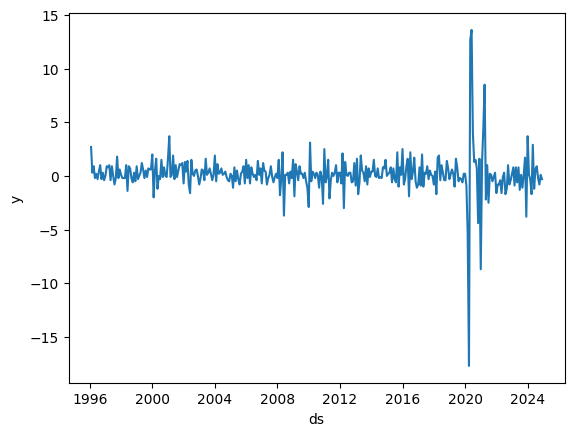

In [48]:
sns.lineplot(data=df_wide, x="ds",y="y")


In [49]:
def drop_last_n_months(df, n):
    if n <= 0:
        return df.copy()  # no changes if n is 0 or negative
    return df.iloc[:-n].copy()

trunc_input = drop_last_n_months(df_wide, 0)

In [51]:
trunc_input.columns

Index(['ds', 'all-retailing-excluding-automotive-fuel', 'y',
       'household-goods-stores', 'non-specialised-stores',
       'non-store-retailing', 'other-stores', 'predominantly-automotive-fuel',
       'predominantly-food-stores', 'textile-clothing-and-footwear-stores',
       'total-of-predominantly-non-food-stores'],
      dtype='object', name='sic-unofficial')

In [50]:
trunc_input.tail(10)

sic-unofficial,ds,all-retailing-excluding-automotive-fuel,y,household-goods-stores,non-specialised-stores,non-store-retailing,other-stores,predominantly-automotive-fuel,predominantly-food-stores,textile-clothing-and-footwear-stores,total-of-predominantly-non-food-stores
434,2024-03-01,-0.7,-0.3,1.0,-4.9,-0.9,2.4,3.1,-1.5,0.2,0.2
435,2024-04-01,-1.2,-1.7,-2.8,1.3,0.5,-3.5,-5.0,-0.5,-3.5,-2.5
436,2024-05-01,2.9,2.9,3.6,1.7,7.2,2.7,2.7,1.1,4.5,3.2
437,2024-06-01,-1.6,-1.2,-2.7,-2.0,-2.0,-1.0,1.9,-1.1,-2.3,-1.9
438,2024-07-01,0.8,0.6,-0.5,3.2,1.0,1.9,-1.2,0.2,0.8,1.4
439,2024-08-01,0.9,0.9,1.6,1.0,-1.4,-1.2,0.7,2.0,2.1,0.6
440,2024-09-01,-0.1,-0.2,0.6,0.5,-0.4,4.9,-0.4,-2.4,0.7,2.1
441,2024-10-01,-1.1,-0.8,-0.3,-0.2,-0.8,-1.1,0.8,-0.8,-3.3,-1.4
442,2024-11-01,0.1,0.1,1.7,-0.7,-0.3,2.4,-0.3,0.3,-3.5,0.1
443,2024-12-01,-0.6,-0.3,0.3,1.2,-1.9,-0.7,1.6,-1.9,4.4,1.1


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - c:\Users\justin.beresford\repos\ml-macro-forecasting\ml-forecast\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.712]% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\justin.beresford\repos\ml-macro-forecasting\ml-forecast\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\justin.beresford\repos\ml-macro-forecasting\ml-forecast\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (22) is too small than the required number                     for the learning rate finder (216). The results might not be optimal.
WARNING - (py.warnings._showwarnmsg) - c:\Users\justin.beresford\repos\ml-macro-forecasting\ml-forecast\Lib\site-packages\pytorch_lightning\utilities\data.py:79: UserWarning:

Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 11. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Finding best initial lr: 100%|██████████| 216/216 [00:01<00:00, 156.27it/s]


Training: |          | 0/? [00:15<?, ?it/s, v_num=18, train_loss=0.0109, reg_loss=0.000, MAE=0.962, RMSE=1.550, Loss=0.011, RegLoss=0.000] 

WARNING - (py.warnings._showwarnmsg) - c:\Users\justin.beresford\repos\ml-macro-forecasting\ml-forecast\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.712]% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\justin.beresford\repos\ml-macro-forecasting\ml-forecast\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\justin.beresford\repos\ml-macro-forecasting\ml-forecast\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._inf


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 493.91it/s] 

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
ERROR - (NP.plotly.plot) - plotly-resampler is not installed. Please install it to use the resampler.


WARNING - (py.warnings._showwarnmsg) - c:\Users\justin.beresford\repos\ml-macro-forecasting\ml-forecast\Lib\site-packages\neuralprophet\plot_forecast_plotly.py:98: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


WARNING - (py.warnings._showwarnmsg) - c:\Users\justin.beresford\repos\ml-macro-forecasting\ml-forecast\Lib\site-packages\neuralprophet\plot_forecast_plotly.py:100: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result


ERROR - (NP.plotly.plot_components) - plotly-resampler is not installed. Please install it to use the resampler.
WARNING - (py.warnings._showwarnmsg) - c:\Users

,ds,yhat1,y,combined,is_forecast
346,2024-12-01,NaN,-0.3,-0.300000,False
347,2025-01-01,-0.228868,NaN,-0.228868,True
348,2025-02-01,0.121793,NaN,0.121793,True
349,2025-03-01,-0.320148,NaN,-0.320148,True
350,2025-04-01,0.032631,NaN,0.032631,True
351,2025-05-01,0.082511,NaN,0.082511,True
352,2025-06-01,0.062326,NaN,0.062326,True
353,2025-07-01,0.034017,NaN,0.034017,True
354,2025-08-01,-0.160603,NaN,-0.160603,True
355,2025-09-01,-0.241066,NaN,-0.241066,True


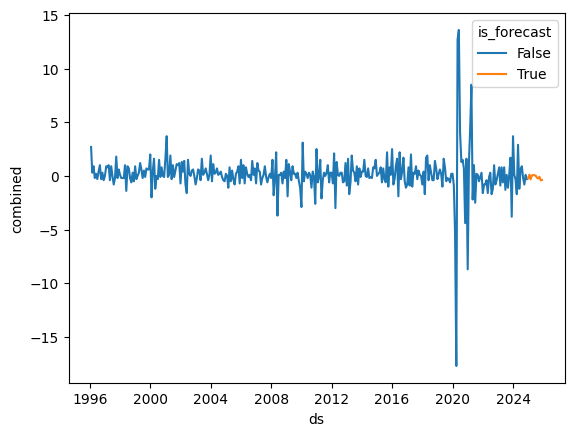

In [17]:
m = NeuralProphet()

metrics = m.fit(trunc_input , freq='MS')

future = m.make_future_dataframe(trunc_input , periods=12)

forecast = m.predict(future)

fig_forecast = m.plot(forecast)
fig_components = m.plot_components(forecast)

merged_df = pd.merge(forecast[['ds', 'yhat1']], trunc_input , on='ds', how='outer')
merged_df['combined'] = merged_df['y'].fillna(merged_df['yhat1'])
merged_df['is_forecast'] = merged_df.y.isna()

merged_df
sns.lineplot(data = merged_df, x='ds',y='combined', hue='is_forecast')

merged_df.tail(13)


In [18]:
merged_df[merged_df.is_forecast].head(1)

,ds,yhat1,y,combined,is_forecast
347,2025-01-01,-0.228868,NaN,-0.228868,True


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - c:\Users\justin.beresford\repos\ml-macro-forecasting\ml-forecast\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.712]% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\justin.beresford\repos\ml-macro-forecasting\ml-forecast\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\justin.beresford\repos\ml-macro-forecasting\ml-forecast\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (22) is too small than the required number                     for the learning rate finder (216). The results might not be optimal.
Finding best initial lr: 100%|██████████| 216/216 [00:01<00:00, 130.60it/s]


Training: |          | 0/? [00:20<?, ?it/s, v_num=25, train_loss=0.000117, reg_loss=0.000, MAE=0.122, RMSE=0.172, Loss=0.000121, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - c:\Users\justin.beresford\repos\ml-macro-forecasting\ml-forecast\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.712]% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\justin.beresford\repos\ml-macro-forecasting\ml-forecast\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Users\justin.beresford\repos\ml-macro-forecasting\ml-forecast\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._inf


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 185.77it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
ERROR - (NP.plotly.plot) - plotly-resampler is not installed. Please install it to use the resampler.
WARNING - (py.warnings._showwarnmsg) - c:\Users\justin.beresford\repos\ml-macro-forecasting\ml-forecast\Lib\site-packages\neuralprophet\plot_forecast_plotly.py:98: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


WARNING - (py.warnings._showwarnmsg) - c:\Users\justin.beresford\repos\ml-macro-forecasting\ml-forecast\Lib\site-packages\neuralprophet\plot_forecast_plotly.py:100: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `n

WARNING - (py.warnings._showwarnmsg) - c:\Users\justin.beresford\repos\ml-macro-forecasting\ml-forecast\Lib\site-packages\neuralprophet\plot_forecast_plotly.py:410: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result




<Axes: xlabel='ds', ylabel='combined'>

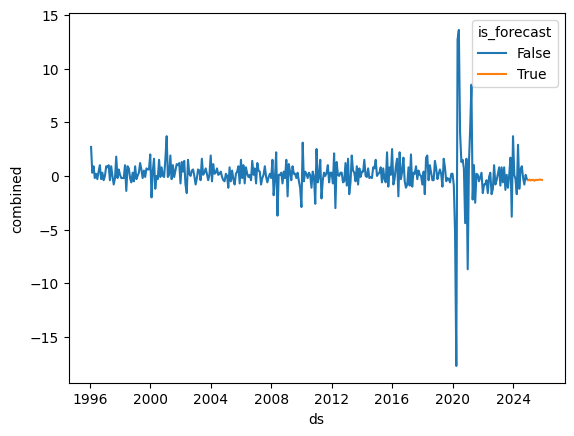

In [ ]:
import pandas as pd
import seaborn as sns
from neuralprophet import NeuralProphet

# --- Step 1: Prepare your training data ---
# Assume trunc_input is your training DataFrame with columns 'ds', 'y', and control variables.
# For example:
# trunc_input = pd.read_csv('your_data.csv')
# Ensure that the 'ds' column is in datetime format:
trunc_input['ds'] = pd.to_datetime(trunc_input['ds'])

# Identify extra regressors (control variables)
control_variables = [col for col in trunc_input.columns if col not in ['ds', 'y']]

# --- Step 2: Initialize and configure the model ---
m = NeuralProphet()

# Add each control variable as a future regressor
for reg in control_variables:
    m = m.add_future_regressor(reg)

# Fit the model with your training data
metrics = m.fit(trunc_input, freq='MS')

# --- Step 3: Create a future dataframe for forecasts ---

# Determine the last date in your training data and generate future dates
last_date = trunc_input['ds'].max()
# Create 12 future periods with the same frequency ('MS' = month start)
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=12, freq='MS')

# Create a DataFrame for future regressors with the future dates
future_reg = pd.DataFrame({'ds': future_dates})
# For each control variable, fill with the last observed value from training data
for reg in control_variables:
    future_reg[reg] = trunc_input[reg].iloc[-1]

# Use make_future_dataframe with the regressors_df parameter
future = m.make_future_dataframe(trunc_input, periods=12, regressors_df=future_reg)

# --- Step 4: Generate forecasts ---
forecast = m.predict(future)

# --- Step 5: (Optional) Plotting the results ---
fig_forecast = m.plot(forecast)
fig_components = m.plot_components(forecast)

# Merge forecast with training data for visualization purposes
merged_df = pd.merge(forecast[['ds', 'yhat1']], trunc_input, on='ds', how='outer')
merged_df['combined'] = merged_df['y'].fillna(merged_df['yhat1'])
merged_df['is_forecast'] = merged_df['y'].isna()

sns.lineplot(data=merged_df, x='ds', y='combined', hue='is_forecast')


In [62]:
merged_df.tail(13)

,ds,yhat1,all-retailing-excluding-automotive-fuel,y,household-goods-stores,non-specialised-stores,non-store-retailing,other-stores,predominantly-automotive-fuel,predominantly-food-stores,textile-clothing-and-footwear-stores,total-of-predominantly-non-food-stores,combined,is_forecast
346,2024-12-01,NaN,-0.6,-0.3,0.3,1.2,-1.9,-0.7,1.6,-1.9,4.4,1.1,-0.300000,False
347,2025-01-01,-0.404802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.404802,True
348,2025-02-01,-0.340005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.340005,True
349,2025-03-01,-0.429740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.429740,True
350,2025-04-01,-0.372366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.372366,True
351,2025-05-01,-0.366138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.366138,True
352,2025-06-01,-0.451103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.451103,True
353,2025-07-01,-0.360665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.360665,True
354,2025-08-01,-0.388303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.388303,True
355,2025-09-01,-0.370155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.370155,True
